## **Lab01: MỐI QUAN HỆ CỦA DỮ LIỆU**

**Giáo viên hướng dẫn:** 
- Lê Ngọc Thành

---

## **Import các thư viện**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
import statsmodels.formula.api as smf

## **Khám phá dữ liệu**

Ta sẽ chọn dữ liệu vào ngày 1/5 làm ngày để khám phá, trực quan hóa dữ liệu

In [2]:
covid_df = pd.read_csv(f'ProcessedData/Covid19-1-5.csv')
covid_df

,#,"Country,Other",TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,"Serious,Critical",TotalCases/1M pop,Deaths/1M pop,TotalTests,Tests/1M pop,Population,Continent
0,1,China,216587,920,5060,38,187525,3447,24002,447,150,4,160000000,111163,1439323776,Asia
1,2,USA,83083425,16518,1020854,21,80719929,35030,1342642,1554,248345,3051,1005593629,3005820,334548810,North America
2,3,India,43082502,3314,523869,26,42538976,2723,19657,698,30668,373,837913110,596468,1404791509,Asia
3,4,Brazil,30454490,6254,663567,16,29533039,13835,257884,8318,141438,3082,63776166,296193,215319917,South America
4,5,France,28682011,36726,145962,32,26826937,25431,1709112,1677,437643,2227,266484045,4066138,65537387,Europe
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
223,224,MS Zaandam,9,0,2,0,7,0,0,0,0,0,0,0,0,The remaining areas
224,225,Niue,9,0,0,0,7,0,2,0,5468,0,0,0,1646,Australia/Oceania
225,226,Micronesia,7,0,0,0,1,0,6,0,60,0,0,0,117226,Australia/Oceania
226,227,Nauru,5,0,0,0,3,0,2,0,457,0,0,0,10948,Australia/Oceania


In [3]:
covid_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 228 entries, 0 to 227
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   #                  228 non-null    int64 
 1   Country,Other      228 non-null    object
 2   TotalCases         228 non-null    int64 
 3   NewCases           228 non-null    int64 
 4   TotalDeaths        228 non-null    int64 
 5   NewDeaths          228 non-null    int64 
 6   TotalRecovered     228 non-null    int64 
 7   NewRecovered       228 non-null    int64 
 8   ActiveCases        228 non-null    int64 
 9   Serious,Critical   228 non-null    int64 
 10  TotalCases/1M pop  228 non-null    int64 
 11  Deaths/1M pop      228 non-null    int64 
 12  TotalTests         228 non-null    int64 
 13  Tests/1M pop       228 non-null    int64 
 14  Population         228 non-null    int64 
 15  Continent          228 non-null    object
dtypes: int64(14), object(2)
memory usage: 28.6+ 

**a. Dữ liệu gồm bao nhiêu dòng và bao nhiêu cột?**

- Dữ liệu gồm 229 dòng và 16 cột.

**b. Các dòng có bị lặp hay không?**

In [4]:
if len(covid_df['Country,Other']) == len(set(covid_df['Country,Other'])):
    duplicated = False
else:
    duplicated = True
duplicated

False

## **Trực quan mối quan hệ giữa các trường dữ liệu**

### **1. Tỉ lệ ca nhiễm COVID của 6 châu lục tính đến hết ngày 1/5/2022 (%) `Pie Chart`**

- Ta sẽ lấy ra dataframe với 2 cột là *TotalCases* và *Continent* lưu vào `df_1`.
- Loại bỏ dòng có Country,Other là World(dòng total của cả dataframe) và các dòng có nước ở các khu vực còn lại ngoài 6 châu lục chính.

In [5]:
df_1=covid_df.loc[covid_df["Country,Other"]!="World"]

df_1 = df_1[["TotalCases","Continent"]] # lấy ra 2 cột "TotalCases", "Continent"

df_1=df_1.loc[df_1["Continent"]!="The remaining areas"]
df_1

,TotalCases,Continent
0,216587,Asia
1,83083425,North America
2,43082502,Asia
3,30454490,South America
4,28682011,Europe
...,...,...
222,10,Africa
224,9,Australia/Oceania
225,7,Australia/Oceania
226,5,Australia/Oceania


- Thực hiện tính toán về tỉ lệ % số ca nhiễm của từng châu lục so với toàn thế giới. 

In [6]:
df_11 = df_1.groupby("Continent").sum()
df_11["TotalCases"] = df_11["TotalCases"]*100 / df_11["TotalCases"].sum()
df_11 = df_11.rename(columns={'TotalCases': '%'})
df_11 = df_11.sort_values('%', ascending = False)
df_11 = df_11.reset_index()
df_11


,Continent,%
0,Europe,37.237963
1,Asia,28.826125
2,North America,19.151093
3,South America,11.065158
4,Africa,2.318513
5,Australia/Oceania,1.401148


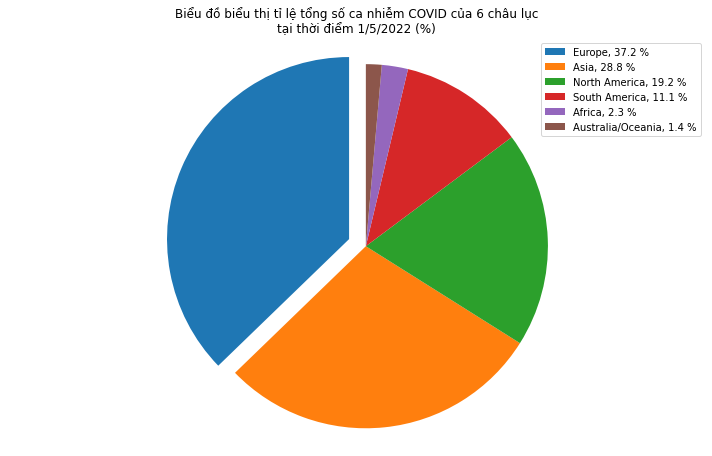

In [7]:
plt.rcParams["figure.figsize"] = [10,6]

explode = (0.1,0,0,0,0,0)
labels=['%s, %1.1f %%' % (l, s) for l, s in zip(df_11["Continent"], df_11["%"])]

patches, texts = plt.pie(df_11["%"],explode=explode, startangle=90)
plt.legend(patches, labels, loc="best")
plt.axis('equal')
plt.tight_layout()
plt.title('Biểu đồ biểu thị tỉ lệ tổng số ca nhiễm COVID của 6 châu lục\ntại thời điểm 1/5/2022 (%)')
plt.show()

**Giải thích:** Việc sử dụng **Pie Chart** sẽ cho ta thấy rõ hơn về tỉ lệ % về tổng số ca nhiễm giữa các châu lục.

**Nhận xét:**
- Europe là châu lục đứng đầu với hơn `37%` cách khá xa các châu lục còn lại.
- Kế đến là Asia-Châu lục đông dân nhất thế giới vẫn đang trong giai đoạn chống dịch.
- Thứ tự ca nhiễm trên pie chart cũng phản ánh rõ thực tế tình trạng dịch bệnh ở thế giới, kết quả cho ra là đúng với kỳ vọng.

### **2. Top 10 quốc gia có số ca nhiễm COVID-19 cao nhất thế giới(tính đến hết ngày 1/5) `Barh Chart`**

- Lấy ra 10 quốc gia có số ca nhiễm COVID-19 cao nhất lưu vào `df_2`.

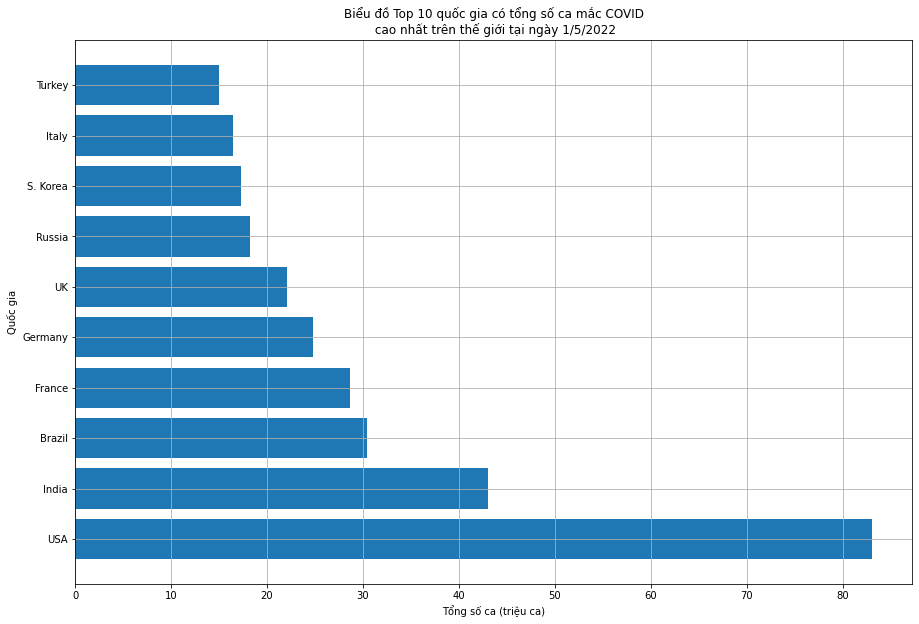

In [8]:
plt.rcParams["figure.figsize"] = [15,10]

N =10

# Lấy ra 10 quốc gia có số ca nhiễm COVID-19 cao nhất
df_2 = covid_df.loc[covid_df["Country,Other"]!="World"].sort_values("TotalCases",ascending = False)[["Country,Other","TotalCases"]][0:N]

plt.barh(df_2["Country,Other"], df_2["TotalCases"]/10**6)
plt.xlabel('Tổng số ca (triệu ca)')
plt.ylabel('Quốc gia')
plt.title('Biểu đồ Top 10 quốc gia có tổng số ca mắc COVID\n cao nhất trên thế giới tại ngày 1/5/2022')
plt.grid(True)
plt.show()

**Giải thích:** Bar Chart phù hợp với việc thống kê số liệu tổng số ca nhiễm của từng nước, tuy nhiên để dễ dàng quan sát ta sẽ sử dụng **Barh Chart**.

**Nhận xét:**
- Các quốc gia dẫn đầu về số ca nhiễm đa phần là Châu Âu và Châu Mỹ.
- Mỹ với tổng số ca nhiễm cao ngất ngưỡng (gấp đôi Ấn Độ) với số ca lên đến hơn 80 triệu ca.

### **3. Tình hình dịch bệnh của các nước trên thế giới(TotalCases/1M pop, Deaths/1M pop, Tests/1M pop)`Histogram`**

- Lấy ra 3 cột *TotalCases/1M pop*, *Deaths/1M pop* và *Tests/1M pop* lưu vào `df_3`.

In [9]:
df_3 = covid_df.loc[covid_df["Country,Other"]!="World"][["TotalCases/1M pop","Deaths/1M pop","Tests/1M pop"]]
df_3

,TotalCases/1M pop,Deaths/1M pop,Tests/1M pop
0,150,4,111163
1,248345,3051,3005820
2,30668,373,596468
3,141438,3082,296193
4,437643,2227,4066138
...,...,...,...
223,0,0,0
224,5468,0,0
225,60,0,0
226,457,0,0


Text(0, 0.5, 'Number of Countries')

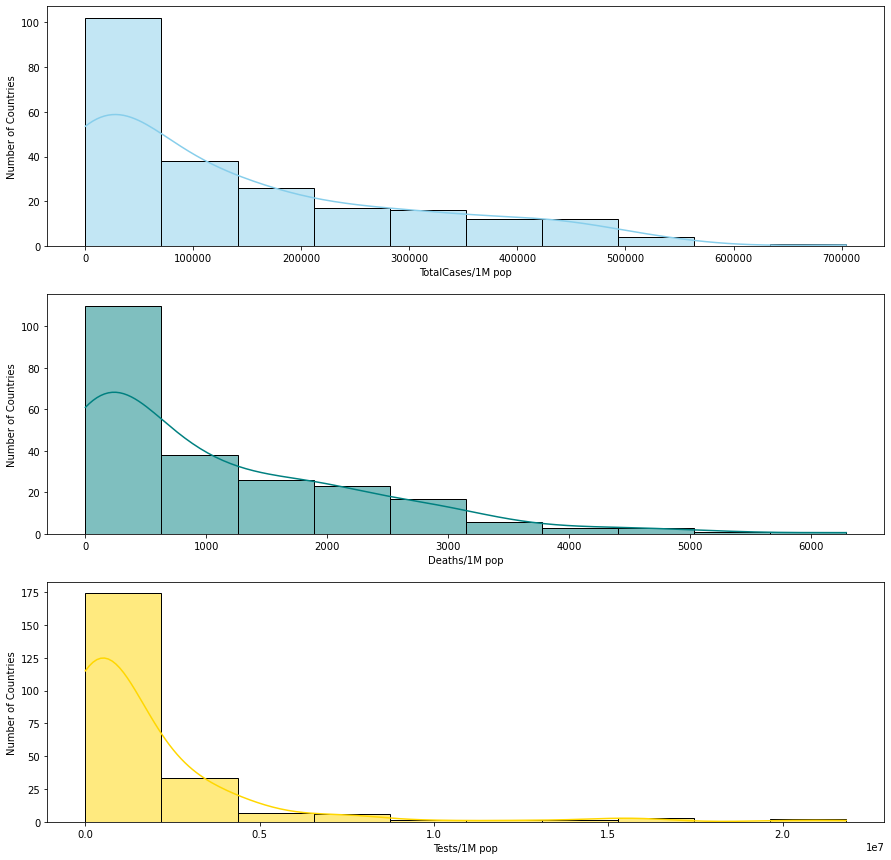

In [10]:
fig, axs = plt.subplots(3, 1, figsize=(15, 15))

sns.histplot(data=df_3, x="TotalCases/1M pop", kde=True, color="skyblue", ax=axs[0], bins=10).set_ylabel("Number of Countries")
sns.histplot(data=df_3, x="Deaths/1M pop", kde=True, color="teal", ax=axs[1], bins=10).set_ylabel("Number of Countries")
sns.histplot(data=df_3, x="Tests/1M pop", kde=True, color="gold", ax=axs[2], bins=10).set_ylabel("Number of Countries")

**Giải thích:** Để thể hiện được số quốc gia với phân bố của các giá trị ta sẽ dùng **Histogram**.

**Nhận xét:**
- Hầu hết các nước trên thế giới đều có chỉ số ca nhiễm, ca tử vong/1 triệu dân khá thấp. Chỉ một vài nước có ca nhiễm và tử vong cao.
- Số ca test/1 triệu dân cũng nằm ở mức khoảng dưới 2,5 triệu lần test/1 triệu dân ở nhiều quốc gia. Trung bình một người dân sẽ test khoảng 2 lần. 

### **4. Với tình hình diễn biến dịch với nhiều chủng virus mới thì tỉ lệ số ca nhiễm ở các châu lục đang diễn biến như thế nào `Box plot`**

- Lấy ra cột *TotalCases/1M pop* và *Continent* lưu vào `df_4` trừ các dòng ở Continent là The remaining areas và All.

In [11]:
df_4 = covid_df.loc[(covid_df["Continent"]!="All") &  (covid_df["Continent"]!="The remaining areas")][["TotalCases/1M pop","Continent"]]

In [12]:
fig = px.box(df_4, y="TotalCases/1M pop",x="Continent")
fig.show()

**Giải thích:** Chọn **Box plot** để thể hiện được sự phân bố của từng châu lục một cách cụ thể nhất.

**Nhận xét:**
- Dựa theo boxplot, ta có thể thấy sự chênh lệch về tỉ lệ số ca nhiễm giữa các châu lục. Châu Phi là châu lục có tỉ lệ ca nhiễm thấp nhất, còn Châu Âu là nơi có tỉ lệ ca nhiễm cao nhất. Tuy nhiên thì vẫn có một vài quốc gia ở Châu Phi có tỉ lệ ca nhiễm cao nhất ngưỡng(~400000 ca nhiễm/ 1 triệu dân).
- Châu Âu là châu lục có tỉ lệ ca nhiễm rất cao, thậm chí còn có nước lên đến 700000 ca nhiễm/1 triệu dân. Mặc dù là châu lục với rất nhiều nước phát triển nhưng có lẽ ý thức và suy nghĩ phòng chống dịch của người dân ở Châu Âu là không cao. Họ thường xem nhẹ việc nhiễm Covid-19. Nhờ vào việc có nền ý tế phát triển và việc tiêm phòng cũng nhanh chóng.

### **5. Mối tương quan giữa các trường dữ liệu cho ta biết điều gì? `Heat map`** 

<AxesSubplot:>

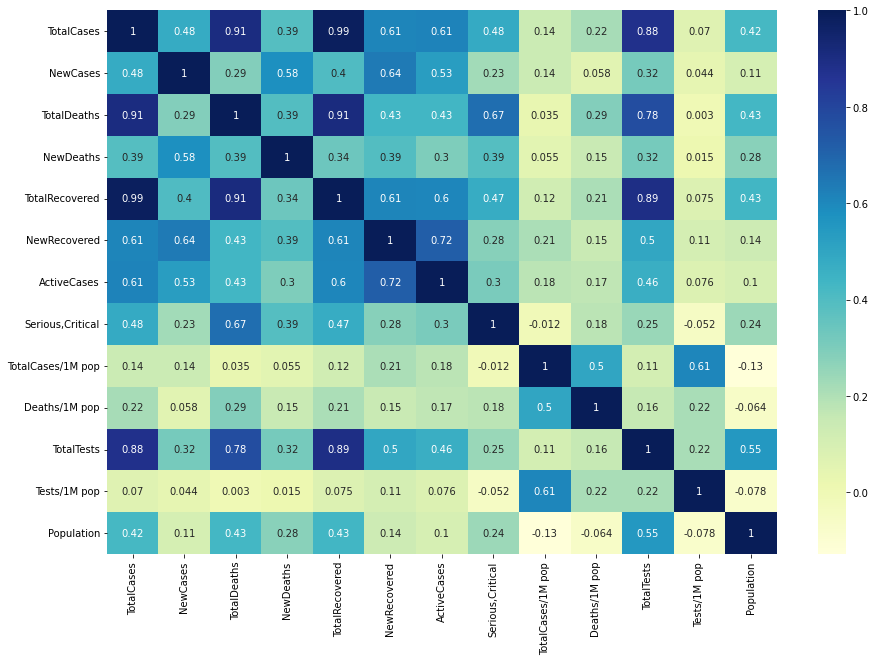

In [13]:
df_5 = covid_df.loc[covid_df["Country,Other"]!="World"].drop('#',axis=1)
plt.rcParams["figure.figsize"] = [15,10]
sns.heatmap(df_5.corr(),annot=True,cmap="YlGnBu")

**Giải thích:** Việc sử dụng **Correlation** matrix sẽ cho ta thấy được mức độ tương quan giữa các trường dữ liệu.

**Nhận xét:** 
- Chúng ta có thể thấy được giữa một số trường dữ liệu có mối quan hệ tuyến tính với nhau: **TotalCases, TotalDeaths, TotalRecovered, NewRecovered, ActiveCases, Serious,Critical, TotalTests**
- Ta có thể thấy đây là một căn bệnh khá nguy hiểm, việc nhiễm bệnh nặng có thể dẫn đến việc tử vong xảy ra khá nhiều. Tuy nhiên, với những ca gần đây thì tỉ lệ nhiễm nặng, nghiêm trọng đã được giảm đi rất nhiều. Cho thấy chất lượng đi lên của y tế và hiệu quả của vacxin.

### **6. Ta sẽ thử kiểm tra hệ số tương quan giữa các trường TotalCases, TotalDeaths, TotalRecovered, TotalTests bằng hồi quy tuyến tính.**

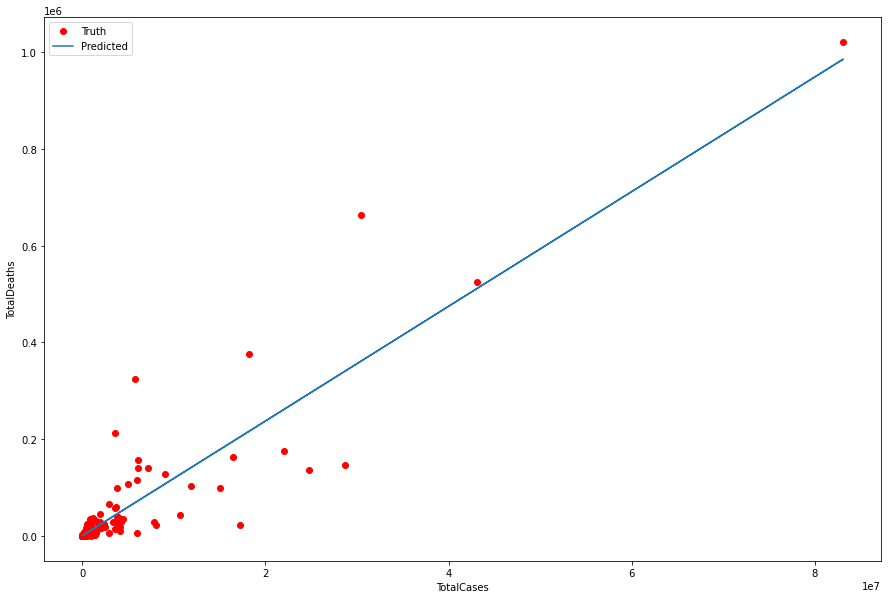

Mức độ biểu diễn của biến TotalCases cho biến TotalDeaths là: 0.8230249736194025


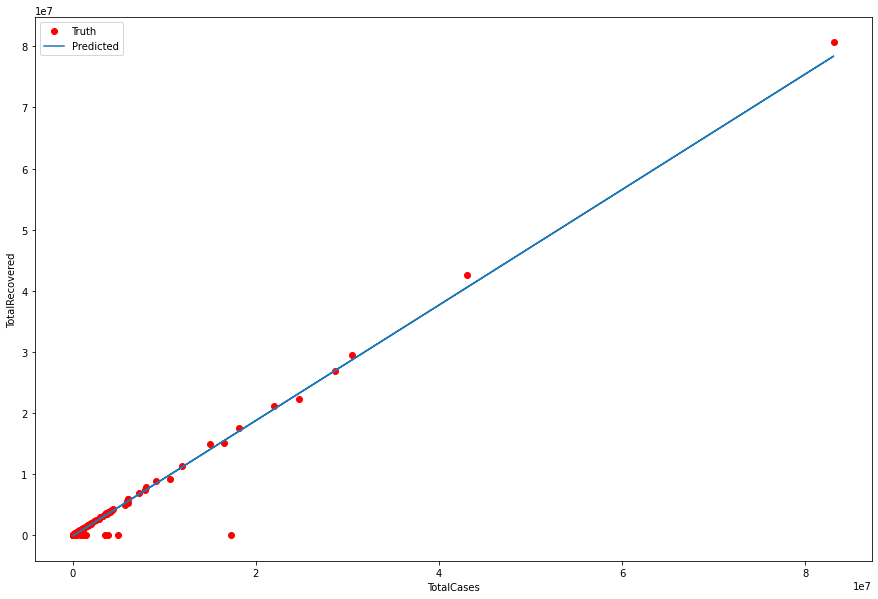

Mức độ biểu diễn của biến TotalCases cho biến TotalRecovered là: 0.9716457514194253


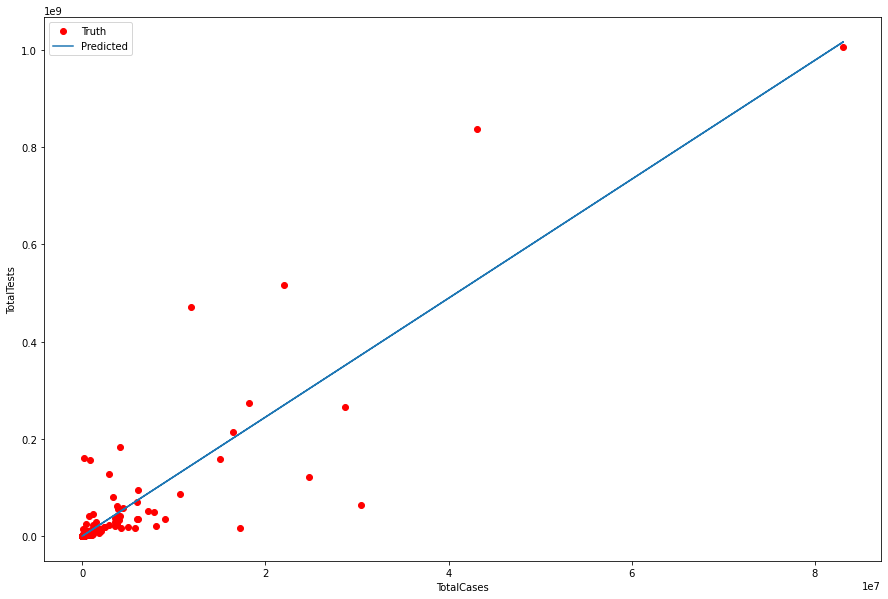

Mức độ biểu diễn của biến TotalCases cho biến TotalTests là: 0.774869808325452


In [14]:
df_6 = covid_df.loc[covid_df["Country,Other"]!="World"]

def LRV(x,y):
    query = y + " ~ " + x
    results = smf.ols(query, data=df_6).fit()
    plt.plot(df_6[x],df_6[y],'ro',label='Truth')
    plt.plot(df_6[x],results.predict(df_6[x]),label='Predicted')
    plt.xlabel(x)
    plt.ylabel(y)
    plt.legend()
    plt.show()
    print(f"Mức độ biểu diễn của biến {x} cho biến {y} là: {results.rsquared}")

LRV('TotalCases', 'TotalDeaths')
LRV('TotalCases', 'TotalRecovered')
LRV('TotalCases', 'TotalTests')

**Nhận xét:** Hệ số biểu diễn giữa `TotalCases` và 3 trường `TotalDeaths, TotalRecovered, TotalTests` là rất cao. Từ đó ta có thể dự đoán được số liệu về số ca mất/hồi phục/test dựa vào tổng số ca nhiễm.

### **7. Ở các nước vẫn còn đang dịch bệnh, sự tương quan giữa các ca nhiễm hồi phục và số ca nhiễm là như thế nào? `Joint plot`**

- Ta sẽ lấy ra những nước có NewRecovered >=500 và ActiveCases nằm trong đoạn từ [500,200000] để có thể đánh giá.

In [15]:
df_7 = covid_df.loc[covid_df["Country,Other"]!="World"]

df_7 = df_7.loc[(df_7["NewRecovered"] >= 500) & (df_7["ActiveCases"]>=500) & (df_7["ActiveCases"]<=200000) ]


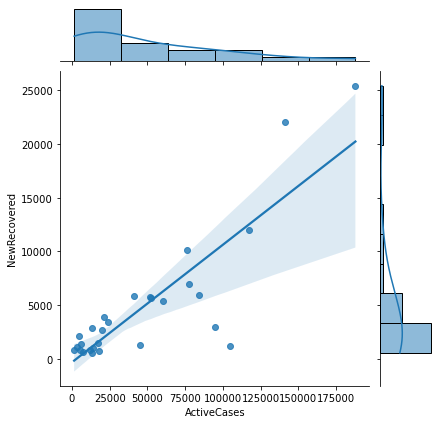

In [16]:
sns.jointplot(data=df_7,x='ActiveCases', y='NewRecovered',kind='reg');

**Giải thích:** Việc sử dụng **Joint plot** cho biết được biến phụ thuộc `NewRecovered` thay đổi như thế nào với biến độc lập `ActiveCases`.

**Nhận xét:**
- Dựa vào đường hồi quy tuyến tính, ta có thể thấy được 2 biến này có sự tương quan với nhau. Mức độ tập trung của các điểm dữ liệu cũng tương đối.
- Số quốc gia nằm dưới đường hồi quy tuyến tính có vẻ ít hơn trên đường hồi quy tuyến tính. Cho thấy việc số ca nhiễm hồi phục của các quốc gia đang tiến triển tốt. Đây cũng là một trong những tác dụng của việc vacxin đã được sử dụng ở nhiều quốc gia trên thế giới.


### **8. Tương quan giữa số ca nhiễm nặng và tổng số ca tử vong `Scatter plot`**

In [17]:
df_8 = covid_df.loc[covid_df["Country,Other"]!="World"][["TotalDeaths","Serious,Critical"]]

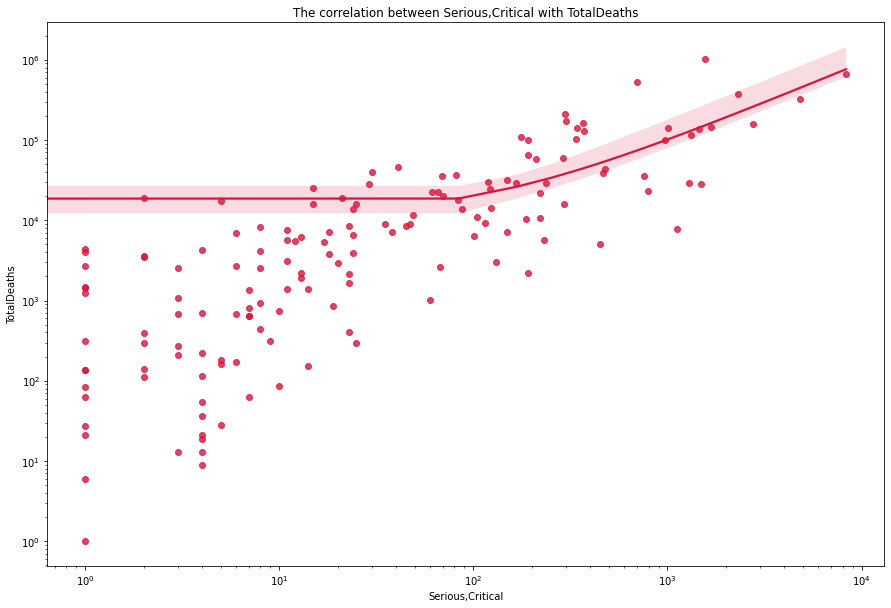

In [18]:
sns.regplot(x='Serious,Critical',y='TotalDeaths', data=df_8,color='#DC143C').set(title='The correlation between Serious,Critical with TotalDeaths')
plt.xscale('log')
plt.yscale('log')

**Giải thích:** Sử dụng **Scatter plot** với các điểm dữ liệu là các quốc gia trên thế giới dựa vào hai thuộc tính là Serious,Critical và TotalDeaths để dễ dàng xem được sự tương quan của chúng.

**Nhận xét:** 
- Qua biểu đồ, ta có thể thấy được có rất nhiều outlier. Vì vậy mức độ tương quan giữa số ca nhiễm nặng(Serious,Critical) và tổng số ca tử vong(TotalDeaths) là không cao. Hay nói cách khác, không phải số ca nhiễm nặng tăng thì sẽ số ca tử vong sẽ tăng.

### **9. Tình hình chung của các châu lục tính đến hết ngày 1-5 `Heatmap`**

In [19]:
df_9 = covid_df.loc[(covid_df["Continent"] != "The remaining areas") & (covid_df["Country,Other"]!="World")][["NewDeaths","NewCases","NewRecovered","Continent","Serious,Critical"]]
df_9 = df_9.groupby("Continent").sum()
df_9

,NewDeaths,NewCases,NewRecovered,"Serious,Critical"
Continent,,,,
Africa,0,4146,1604,970
Asia,375,109994,92856,12945
Australia/Oceania,13,39225,40047,186
Europe,388,107447,249109,9347
North America,82,21764,39706,7109
South America,62,10434,20309,10772


In [20]:
fig = px.imshow(df_9,  width=800, height=500,color_continuous_scale=px.colors.sequential.Viridis)
fig.show()

**Giải thích:** Sử dụng **Heatmap** để dễ dàng so sánh các thông tin về số ca nhiễm giữa các châu lục.

**Nhận xét:**
- Số lượng ca nhiễm mới vẫn xảy ra nhiều ở Châu Á và Châu Âu. Tuy nhiên Châu Âu lại có số lượng ca hồi phục gấp gần 3 lần so với Châu Á, vì hầu hết các nước Châu Âu đều có nền y tế tốt và tiên tiến hơn là nhiều nước nghèo ở Châu Á.
- Các chỉ số còn lại của các châu lục khác cũng không có gì bất thường.

### **10. Liệu dân số của các châu lục có ảnh hướng đến số lượng ca nhiễm và ca test của châu lục đó hay không? `Bubble plot`**

In [21]:
df_10 = covid_df.loc[(covid_df["Continent"] != "The remaining areas") & (covid_df["Country,Other"]!="World")][["TotalCases","TotalTests","Population","Continent"]]
df_10 = df_10.groupby("Continent").sum().reset_index()
df_10

,Continent,TotalCases,TotalTests,Population
0,Africa,11906465,101415480,1399215150
1,Asia,148033361,2100240228,4671261675
2,Australia/Oceania,7195440,77958937,43487633
3,Europe,191231424,2657157275,748454729
4,North America,98348310,1124890525,597543521
5,South America,56823891,219593833,437253575


In [22]:
fig = px.scatter(df_10, x="TotalCases", y="TotalTests",
         size="Population", hover_name="Continent", color="Continent",
                 log_x=True, size_max=60)
fig.show()

**Giải thích:** **Bubble plot** sẽ giúp ta thuận tiện hơn trong việc trực quan hóa đồng thời 3 trường dữ liệu để dễ dàng so sánh.

**Nhận xét:**
- Châu Á là châu lục có số dân vượt trôi so với các châu lục khác, cũng tương đương với việc số ca nhiễm và số lần test ở châu lục này cao.
- Tuy nhiên Châu Âu mới là châu lục có số ca nhiễm và số lần test đứng đầu mặc dù có số dân chỉ bằng 1/6 Châu Á.
- Châu Phi tuy có số dân cao hơn Nam Mĩ, Bắc Mĩ và Châu Ây nhưng số ca nhiễm và số lần test lại thua xa 3 châu lục này.
- Có thể nói, dân số không hẳn là yếu tố dẫn đến số lượng ca nhiễm và số lần test nhiều hay ít.

### **11. Tình hình dịch bệnh ở Việt Nam so với khu vực Đông Nam Á tính đến hết ngày 1-5-2022 `Multi Radar Chart`**

- Đầu tiên ta sẽ lấy ra mean của 5 trường dữ liệu `TotalCases/1M pop, Deaths/1M pop, TotalRecovered, Tests/1M pop, Serious,Critical` của 10 nước còn lại ở khu vực Đông Nam Á và lưu vào `df_DNA_mean`.
- Và dữ liệu 5 trường dữ liệu trên của Việt Nam sẽ được lưu vào `df_11`.
- Sau đó gộp 2 dataframe trên vào nhau với dòng đầu là của Việt Nam và dòng sau là của 10 nước còn lại ở Đông Nam Á.

In [23]:
cols = ['TotalCases/1M pop', 'Deaths/1M pop', 'TotalRecovered','Tests/1M pop','Serious,Critical']
countrys = ['Timor-Leste','Cambodia','Brunei ','Laos','Myanmar','Singapore','Philippines','Thailand','Indonesia','Malaysia']

df_DNA_mean = covid_df.loc[covid_df["Country,Other"].isin(countrys)][cols].mean()

df_11 = covid_df.loc[covid_df["Country,Other"]== "Vietnam"][cols].astype(float)
df_DNA_mean = df_DNA_mean.to_frame().T.astype(float)

df_11 =df_11.append(df_DNA_mean,ignore_index=True)
df_11

C:\Users\123\AppData\Local\Temp/ipykernel_15392/1233719957.py:9: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



,TotalCases/1M pop,Deaths/1M pop,TotalRecovered,Tests/1M pop,"Serious,Critical"
0,107678.0,435.0,9264366.0,867200.0,475.0
1,83424.2,402.1,2000278.8,891911.4,463.2


- Để dễ dàng quan sát trên Radar Chart, ta sẽ tiến hành chuẩn hóa theo tỉ lệ % ở các trường dữ liệu.

In [24]:
df_11['TotalCases/1M pop'] = (df_11['TotalCases/1M pop'] / df_11['TotalCases/1M pop'].sum())*100
df_11['Deaths/1M pop'] = (df_11['Deaths/1M pop'] / df_11['Deaths/1M pop'].sum())*100
df_11['TotalRecovered'] = (df_11['TotalRecovered'] / df_11['TotalRecovered'].sum())*100
df_11['Tests/1M pop'] = (df_11['Tests/1M pop'] / df_11['Tests/1M pop'].sum())*100
df_11['Serious,Critical'] = (df_11['Serious,Critical'] / df_11['Serious,Critical'].sum())*100
df_11

,TotalCases/1M pop,Deaths/1M pop,TotalRecovered,Tests/1M pop,"Serious,Critical"
0,56.345767,51.965118,82.24286,49.297617,50.628864
1,43.654233,48.034882,17.75714,50.702383,49.371136


In [25]:
fig = go.Figure()

fig.add_trace(go.Scatterpolar(r=df_11.to_numpy()[0], theta=cols, fill='toself', name='Viet Nam'))

fig.add_trace(go.Scatterpolar(r=df_11.to_numpy()[1], theta=cols, fill='toself', name='Southeast Asia'))

fig.update_layout(polar=dict(radialaxis=dict(visible=True,range=[0, 100])))

fig.show()

**Giải thích:** Sử dụng **Multi Trace Radar chart** để dễ dàng so sánh được tình hình dịch của Việt Nam so với các nước còn lại ở khu vực Đông Nam Á.

**Nhận xét:**
- Chỉ số về `Tests/1M pop,Deaths/1M pop, TotalCases/1M pop, Serious,Critical` ở Việt Nam nằm ở mức tương đương với các nước còn lại ở trong khu vực Đông Nam Á, không quá vượt trôi hơn.
- Tuy nhiên, về việc số ca hồi phục ở Việt Nam lại gấp 4 lần, cao vượt trội. Điều này chứng tỏ y tế ở Việt Nam đã làm rất tốt và việc điều trị covid cũng hiệu quả so với mặt bằng chung ở các nước Đông Nam Á.

## **Tài liệu tham khảo**

- Slide lí thuyết của thầy Bùi Tiến Lên.
- [Matplotlib Document](https://matplotlib.org/stable/tutorials/index)
- [Seaborn Document](https://seaborn.pydata.org/)
- [Plotly Express Document](https://plotly.com/python/plotly-express/)